In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df_ = pd.read_csv("persona.csv")
df_.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [3]:
df = df_.copy()

In [4]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [5]:
df.shape

(5000, 5)

In [6]:
df.value_counts()

PRICE  SOURCE   SEX     COUNTRY  AGE
29     android  male    usa      15     29
49     android  male    usa      15     25
39     android  male    usa      15     25
29     ios      male    usa      15     23
39     ios      female  deu      16     22
                                        ..
29     ios      male    tur      16      1
39     android  male    usa      34      1
49     android  male    deu      18      1
19     android  male    usa      29      1
59     ios      male    usa      59      1
Name: count, Length: 1384, dtype: int64

In [7]:
df.SEX.value_counts()

SEX
female    2621
male      2379
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [9]:
df.isnull()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4995,False,False,False,False,False
4996,False,False,False,False,False
4997,False,False,False,False,False
4998,False,False,False,False,False


In [10]:
df.isnull().sum()

PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64

In [11]:
df.nunique()

PRICE       6
SOURCE      2
SEX         2
COUNTRY     6
AGE        46
dtype: int64

In [12]:
df.SEX.unique()

array(['male', 'female'], dtype=object)

In [13]:
df["SEX"].value_counts()/df.shape[0]

SEX
female    0.5242
male      0.4758
Name: count, dtype: float64

In [14]:
df.groupby(["COUNTRY"]).agg({"PRICE": ["sum", "mean", "count"]})


PRICE                 
           sum       mean count
COUNTRY                        
bra      51354  34.327540  1496
can       7730  33.608696   230
deu      15485  34.032967   455
fra      10177  33.587459   303
tur      15689  34.787140   451
usa      70225  34.007264  2065

In [15]:
df["SOURCE"].value_counts()

SOURCE
android    2974
ios        2026
Name: count, dtype: int64

In [16]:
df.groupby("COUNTRY").agg({"PRICE":"mean"})

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


In [17]:
df.groupby("SOURCE").agg({"PRICE":"mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


In [18]:
df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

In [19]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"}).reset_index().head(30)

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,female,15,38.714286
1,bra,android,female,16,35.944444
2,bra,android,female,17,35.666667
3,bra,android,female,18,32.255814
4,bra,android,female,19,35.206897
5,bra,android,female,20,31.000000
6,bra,android,female,21,37.292683
7,bra,android,female,22,34.945946
8,bra,android,female,23,31.941176
9,bra,android,female,24,36.500000


In [20]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"}).sort_values("PRICE", ascending=False)

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

In [21]:
agg_df = df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"}).sort_values("PRICE", ascending=False).reset_index()

In [22]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


In [23]:
agg_df.columns

Index(['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'PRICE'], dtype='object')

In [24]:
agg_df.shape

(348, 5)

In [25]:
agg_df.SEX.value_counts()

SEX
female    179
male      169
Name: count, dtype: int64

In [26]:
agg_df["AGE"].min()

15

In [27]:
agg_df["AGE"].max()

66

In [28]:
[agg_df["AGE"].min(), 18, 23, 30, 40, agg_df["AGE"].max()]

[15, 18, 23, 30, 40, 66]

<Axes: >

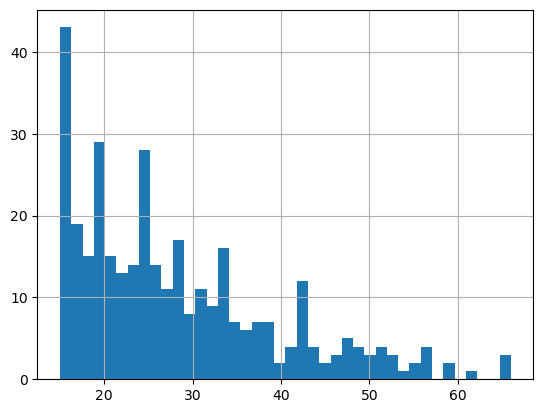

In [29]:
agg_df["AGE"].hist(bins=40)

In [30]:
bins = [agg_df["AGE"].min(), 18, 23, 30, 40, agg_df["AGE"].max()]
bins

[15, 18, 23, 30, 40, 66]

In [31]:
mylabels = '0_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["AGE"].max())
mylabels

('0_18', '19_23', '24_30', '31_40', '41_66')

In [32]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


In [33]:
agg_df["age_cat_m"] = 5

In [34]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat_m
0,bra,android,male,46,59.0,5
1,usa,android,male,36,59.0,5
2,fra,android,female,24,59.0,5
3,usa,ios,male,32,54.0,5
4,deu,android,female,36,49.0,5
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,5
344,usa,ios,female,30,19.0,5
345,can,android,female,27,19.0,5
346,fra,android,male,18,19.0,5


In [35]:
agg_df["age_cat_m"] = pd.cut(agg_df["AGE"], bins, labels=mylabels)

In [36]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat_m
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40
344,usa,ios,female,30,19.0,24_30
345,can,android,female,27,19.0,24_30
346,fra,android,male,18,19.0,0_18


In [37]:
agg_df["age_cat_m"].value_counts()

age_cat_m
24_30    78
19_23    71
31_40    65
41_66    57
0_18     55
Name: count, dtype: int64

In [38]:
agg_df.columns

Index(['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'PRICE', 'age_cat_m'], dtype='object')

In [39]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat_m
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


In [40]:
agg_df.values

array([['bra', 'android', 'male', 46, 59.0, '41_66'],
       ['usa', 'android', 'male', 36, 59.0, '31_40'],
       ['fra', 'android', 'female', 24, 59.0, '24_30'],
       ...,
       ['can', 'android', 'female', 27, 19.0, '24_30'],
       ['fra', 'android', 'male', 18, 19.0, '0_18'],
       ['deu', 'android', 'male', 26, 9.0, '24_30']], dtype=object)

In [41]:
agg_df.values[0][0]

'bra'

In [42]:
agg_df.values[0][1]

'android'

In [43]:
#bra_android_male_41_66

In [44]:
agg_df.values[0][0] + "_" + agg_df.values[0][1] + "_" + agg_df.values[0][2] + "_" + agg_df.values[0][5]

'bra_android_male_41_66'

In [45]:
type(agg_df.shape[0])
for j in range(agg_df.shape[1]):
        print(j)

0
1
2
3
4
5


In [46]:

for i in range(agg_df.shape[0]) :
    print(
            str(agg_df.values[i][0]) + "_" +
            str(agg_df.values[i][1]) + "_" +
            str(agg_df.values[i][2]) + "_" +
            str(agg_df.values[i][5])
        )

bra_android_male_41_66
usa_android_male_31_40
fra_android_female_24_30
usa_ios_male_31_40
deu_android_female_31_40
deu_android_female_41_66
deu_ios_male_19_23
usa_android_female_41_66
fra_ios_male_19_23
usa_ios_male_41_66
deu_android_male_nan
bra_android_female_24_30
usa_android_female_41_66
tur_ios_male_24_30
deu_android_male_31_40
tur_ios_female_0_18
bra_android_female_41_66
bra_ios_female_19_23
tur_android_female_31_40
bra_android_female_31_40
tur_ios_male_31_40
tur_android_male_nan
usa_ios_male_24_30
bra_ios_male_41_66
deu_android_male_19_23
usa_ios_male_24_30
tur_android_female_0_18
usa_android_male_41_66
tur_android_male_24_30
usa_ios_female_41_66
fra_android_male_19_23
usa_ios_male_31_40
tur_android_female_nan
fra_ios_male_0_18
tur_ios_female_19_23
tur_android_female_31_40
tur_android_male_24_30
fra_android_male_19_23
bra_android_male_24_30
can_android_male_24_30
can_android_male_19_23
usa_android_male_41_66
tur_android_male_24_30
bra_android_male_31_40
bra_android_male_nan
usa_

In [47]:
[str(row[0]).upper() + "_" + str(row[1]).upper() + "_" + str(row[2]).upper() + "_" + str(row[5]).upper() for row in agg_df.values]

['BRA_ANDROID_MALE_41_66',
 'USA_ANDROID_MALE_31_40',
 'FRA_ANDROID_FEMALE_24_30',
 'USA_IOS_MALE_31_40',
 'DEU_ANDROID_FEMALE_31_40',
 'DEU_ANDROID_FEMALE_41_66',
 'DEU_IOS_MALE_19_23',
 'USA_ANDROID_FEMALE_41_66',
 'FRA_IOS_MALE_19_23',
 'USA_IOS_MALE_41_66',
 'DEU_ANDROID_MALE_NAN',
 'BRA_ANDROID_FEMALE_24_30',
 'USA_ANDROID_FEMALE_41_66',
 'TUR_IOS_MALE_24_30',
 'DEU_ANDROID_MALE_31_40',
 'TUR_IOS_FEMALE_0_18',
 'BRA_ANDROID_FEMALE_41_66',
 'BRA_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'TUR_IOS_MALE_31_40',
 'TUR_ANDROID_MALE_NAN',
 'USA_IOS_MALE_24_30',
 'BRA_IOS_MALE_41_66',
 'DEU_ANDROID_MALE_19_23',
 'USA_IOS_MALE_24_30',
 'TUR_ANDROID_FEMALE_0_18',
 'USA_ANDROID_MALE_41_66',
 'TUR_ANDROID_MALE_24_30',
 'USA_IOS_FEMALE_41_66',
 'FRA_ANDROID_MALE_19_23',
 'USA_IOS_MALE_31_40',
 'TUR_ANDROID_FEMALE_NAN',
 'FRA_IOS_MALE_0_18',
 'TUR_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'TUR_ANDROID_MALE_24_30',
 'FRA_ANDROID_MALE_19_23',
 'BRA_ANDRO

In [48]:
agg_df["customers_level_based"] = [str(row[0]).upper() + "_" + str(row[1]).upper() + "_" + str(row[2]).upper() + "_" + str(row[5]).upper() for row in agg_df.values]

In [49]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat_m,customers_level_based
0,bra,android,male,46,59.0,41_66,BRA_ANDROID_MALE_41_66
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [50]:
agg_df["customers_level_based"].value_counts()

customers_level_based
USA_ANDROID_MALE_24_30      7
BRA_ANDROID_MALE_24_30      7
USA_IOS_FEMALE_24_30        7
USA_ANDROID_MALE_41_66      7
BRA_ANDROID_FEMALE_24_30    7
                           ..
USA_IOS_FEMALE_NAN          1
CAN_IOS_MALE_NAN            1
USA_IOS_MALE_NAN            1
TUR_ANDROID_FEMALE_NAN      1
FRA_ANDROID_MALE_0_18       1
Name: count, Length: 130, dtype: int64

In [51]:
agg_df[["customers_level_based", "PRICE"]].value_counts()

customers_level_based     PRICE    
USA_ANDROID_MALE_31_40    29.000000    3
DEU_IOS_FEMALE_19_23      34.000000    2
USA_ANDROID_FEMALE_24_30  29.000000    2
TUR_IOS_FEMALE_24_30      34.000000    2
BRA_IOS_MALE_31_40        29.000000    2
                                      ..
DEU_ANDROID_FEMALE_19_23  31.000000    1
DEU_ANDROID_FEMALE_0_18   33.736842    1
                          27.000000    1
CAN_IOS_MALE_NAN          37.571429    1
USA_IOS_MALE_NAN          33.729730    1
Name: count, Length: 340, dtype: int64

In [52]:
agg_df[["customers_level_based", "PRICE"]]

,customers_level_based,PRICE
0,BRA_ANDROID_MALE_41_66,59.0
1,USA_ANDROID_MALE_31_40,59.0
2,FRA_ANDROID_FEMALE_24_30,59.0
3,USA_IOS_MALE_31_40,54.0
4,DEU_ANDROID_FEMALE_31_40,49.0
...,...,...
343,USA_IOS_FEMALE_31_40,19.0
344,USA_IOS_FEMALE_24_30,19.0
345,CAN_ANDROID_FEMALE_24_30,19.0
346,FRA_ANDROID_MALE_0_18,19.0


In [53]:
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})

In [54]:
agg_df = agg_df.reset_index()

In [55]:
agg_df.sort_values("PRICE", ascending = False)

,customers_level_based,PRICE
51,DEU_ANDROID_MALE_NAN,46.500000
64,FRA_ANDROID_FEMALE_24_30,45.428571
102,TUR_IOS_MALE_24_30,45.000000
94,TUR_ANDROID_MALE_NAN,42.333333
103,TUR_IOS_MALE_31_40,42.333333
...,...,...
104,TUR_IOS_MALE_41_66,25.052632
101,TUR_IOS_MALE_19_23,24.833333
26,CAN_ANDROID_FEMALE_24_30,19.000000
67,FRA_ANDROID_MALE_0_18,19.000000


In [56]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=['D','C','B','A'])

In [57]:
agg_df.head()

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,34.622308,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,B
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_66,36.737179,A


In [58]:
agg_df.groupby("SEGMENT").agg({"PRICE":"mean"})

/var/folders/st/g578wh254q58gyrbtjhdkz380000gn/T/ipykernel_16333/645633161.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df.groupby("SEGMENT").agg({"PRICE":"mean"})


,PRICE
SEGMENT,
D,29.009190
C,33.463832
B,34.982836
A,39.110157


In [61]:
agg_df.head()
new_user = "FRA_IOS_FEMALE_31_40"

In [63]:
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
75,FRA_IOS_FEMALE_31_40,32.818182,C
